#**steps1st**
**importing all the neccessary libreries which is required**

In [ ]:
#  importing all the librery for the exploratory data analysis for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For displaying all columns
pd.set_option("display.max_columns", None)

#For displaying all rows
pd.set_option("display.max_rows", None)
import plotly
import plotly.express as px



In [ ]:
#importing useful algorithm according to this data
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
#importing some statistical measures
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    log_loss,
    roc_auc_score,
    precision_score,
    recall_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)


#**steps2**
connecting my google drive

In [ ]:
#   code for the connnection of google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/datasets/anshtanwar/metro-train-dataset?resource=download

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data for the model/MetroPT3(AirCompressor).csv", header=0 , parse_dates=['timestamp'], index_col ='timestamp')

#**Steps3-- Showing Aim of This Case Study And Description of the data**

# ***Case Study Name ---  Predictive Maintenance of the Air Production Unit on a MetroPT3 locomotive***

This project focuses on analyzing data from an ***Air Production Unit (APU)*** to predict when the ***system is approaching failure***.

 # ***Objective of the Project***#
**Analyze APU Data:**

Study sensor data from the unit to detect patterns that indicate whether the system is functioning normally or nearing failure.

**Identify Failure Indicators:**

***Hour Pre-Failure***: Analyze data from one hour before failure.

***Day Pre-Failure***: Study patterns a day before the failure.

***Week Pre-Failure***: Understand trends in the week leading up to failure.

***Train Classification Models:***

Build machine learning models that classify:
Healthy State (0): Normal operation with no signs of failure.
Impending Failure (1): The system is showing signs of failure.

# Process Overview

**Steps1: Analyze Pre-Failure Periods**

***Hour Pre-Failure:**

Check sensor data for unusual patterns (e.g., spikes in airflow, pressure, or temperature) an hour before failure.

***Day Pre-Failure:***

Study daily trends to identify deviations in key features such as oil level and pressure fluctuations.

***Week Pre-Failure:***

Look at weekly trends to find consistent indicators like sustained low oil levels or high temperatures.

**Step 2: Identify Healthy vs. Failure States**

***Healthy State:***
When sensor readings follow normal patterns, the model classifies the system as healthy.

***Impending Failure:***
Unusual patterns like pressure spikes, temperature changes, or airflow irregularities indicate an impending failure.

**Step 3: Train Machine Learning Models**
Use historical data to label observations as healthy (0) or failure-prone (1).

***Train machine learning models such as:***

***Logistic Regression***

***Random Forest***

***XGBoost**
These models will predict whether the system is likely to fail based on its current sensor readings.

**3. Expected Outcomes**

***Failure Indicators:***

Identify key features that serve as failure warnings:
such as

***High Temperature:*** A consistent rise in oil temperature before failure.

***Low Oil Level***: Persistent drops in oil level over time.

***Pressure Fluctuations:*** Unstable airflow or pressure values.

***Real-Time Predictions:***
The trained models will predict the system's health in real time:
Healthy or nearing failure.

***Preventive Maintenance:***
By identifying failure indicators early, predictive maintenance can be implemented, reducing downtime and associated costs.





# ***Dataset Description***

The dataset was gathered to facilitate the development of predictive maintenance, anomaly detection, and ***Remaining Useful Life (RUL)*** prediction models for compressors using deep learning and machine learning techniques. It contains multivariate time-series data recorded by both analogue and digital sensors placed on a compressor in a train. Collected between February and August 2020, the dataset includes 15 signals such as pressures, motor current, oil temperature, and electrical signals from air intake valves. Industrial equipment events, including temporal behaviors and fault occurrences, were captured in the sensor logs, which recorded data at a 1Hz frequency using an onboard embedded device.

***Attribute Information:***
<h4>The dataset consists of 1,516,948 data points collected at 1Hz  from February to August 2020 and is described by 15 features from 7 analogue (1-7) and 8 digital (8-15) sensors:</h4>
<ol>
    <li>TP2 (bar) – the measure of the pressure on the compressor.</li>
    <li>TP3 (bar) – the measure of the pressure generated at the pneumatic panel.</li>
    <li>H1 (bar) – the measure of the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs.</li>
    <li>DV pressure (bar) – the measure of the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.</li>
    <li>Reservoirs (bar) – the measure of the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).</li>
    <li>Motor Current (A) –  the measure of the current of one phase of the three-phase motor; it presents values close to 0A - when it turns off, 4A - when working offloaded, 7A - when working under load, and 9A - when it starts working.</li>
    <li>Oil Temperature (ºC) –  the measure of the oil temperature on the compressor.</li>
    <li>COMP - the electrical signal of the air intake valve on the compressor; it is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.</li>
    <li>DV electric – the electrical signal that controls the compressor outlet valve; it is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.</li>
    <li>TOWERS – the electrical signal that defines the tower responsible for drying the air and the tower responsible for draining the humidity removed from the air; when not active, it indicates that tower one is functioning; when active, it indicates that tower two is in operation.</li>
    <li>MPG – the electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes the same behaviour as the MPG sensor.</li>
    <li>LPS – the electrical signal that detects and activates when the pressure drops below 7 bars.</li>
    <li>Pressure Switch - the electrical signal that detects the discharge in the air-drying towers.</li>
    <li>Oil Level – the electrical signal that detects the oil level on the compressor; it is active when the oil is below the expected values.</li>
    <li>Caudal Impulse – the electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.</li>
</ol>

#steps4
1- cheking the overview of data of 5 rows

2-Deleting the column name unnamed: because it has no uses for our analysis

3-checking the shape of data ie number of rows and column

In [ ]:
df.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,20,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
df.drop(columns = ['Unnamed: 0',], inplace=True)

In [ ]:
df.shape

(1516948, 15)

#**steps4-Checking the frequency of sampling**
1- we are checking the timestamp gap is same throught the data or not

2- we are also checking the total number of different time space

3-Checking the total time in seconds : to check the for how many times data is collected

In [ ]:

#1- we are checking the timestamp gap is same throught the data or not
freq_counts = df.index.to_series().diff().value_counts()
freq_counts = freq_counts.sort_values(ascending=False)
freq_counts.head()




,count
timestamp,
0 days 00:00:10,1337521
0 days 00:00:09,128277
0 days 00:00:12,38321
0 days 00:00:13,7988
0 days 00:00:11,4471


Here we can clearly say that timespan is not same throught so in this data we have different frequencies of time span

In [ ]:
# Checking the total time in seconds : to check the for how many times data is collected





# Calculating the difference between consecutive timestamps
time_diffs = df.index.to_series().diff()

# Converting time differences to total seconds
time_diffs_seconds = time_diffs.dt.total_seconds()

# Summing the total seconds
total_seconds = time_diffs_seconds.sum()


print(f"Total seconds: {total_seconds}")


Total seconds: 18417590.0


#**steps5**
**we are  changing the name of our column name because spelling mistakes in column**
ie-'DV_eletric':'DV_electric'
and

**checking the information of overall data**

to check the  number of null_values and and number of null_values and datatype-information and total number of columns and time frame  and the name of all attributes for the clarification





In [ ]:
# Renaming columns for legibility, and dropping the duplicate index
df = df.rename(columns={'DV_eletric':'DV_electric'})

# Examining null count and data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1516948 non-null  float64
 1   TP3              1516948 non-null  float64
 2   H1               1516948 non-null  float64
 3   DV_pressure      1516948 non-null  float64
 4   Reservoirs       1516948 non-null  float64
 5   Oil_temperature  1516948 non-null  float64
 6   Motor_current    1516948 non-null  float64
 7   COMP             1516948 non-null  float64
 8   DV_electric      1516948 non-null  float64
 9   Towers           1516948 non-null  float64
 10  MPG              1516948 non-null  float64
 11  LPS              1516948 non-null  float64
 12  Pressure_switch  1516948 non-null  float64
 13  Oil_level        1516948 non-null  float64
 14  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15)
memory usage: 185.

#**Steps6**
**Displaying summary statistics with suppressed scientific notation and rounded to 6 decimal places t and readble format**

In [ ]:


# Displaying summary statistics with suppressed scientific notation and rounded to 6 decimal places
formatted_description = df.describe().apply(lambda s: s.apply('{:.6f}'.format))
formatted_description

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000,1516948.000000
mean,1.367826,8.984611,7.568155,0.055956,8.985233,62.644182,2.050171,0.836957,0.160611,0.919848,0.832664,0.003420,0.991437,0.904156,0.937107
std,3.250930,0.639095,3.333200,0.382402,0.638307,6.516261,2.302053,0.369405,0.367172,0.271528,0.373276,0.058381,0.092141,0.294378,0.242771
min,-0.032000,0.730000,-0.036000,-0.032000,0.712000,15.400000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.014000,8.492000,8.254000,-0.022000,8.494000,57.775000,0.040000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,-0.012000,8.960000,8.784000,-0.020000,8.960000,62.700000,0.045000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,-0.010000,9.492000,9.374000,-0.018000,9.492000,67.250000,3.807500,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,10.676000,10.302000,10.288000,9.844000,10.300000,89.050000,9.295000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# important_note:  we have resampling our data  with respect to 10 second but we will not use to find the anomaly detection only to see the statististics summary we have finded

# Resampling the DataFrame to 10-second intervals using the mean
df_resampled = df.resample('10S').mean()

# Printed the first few rows of the resampled DataFrame
df_resampled.head(2)

<ipython-input-85-464d5979b90e>:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('10S').mean()


,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.6000,0.04000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.013,9.343,9.327,-0.022,9.343,53.6375,0.04125,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
#this coding for the filling null values with the time interpolation

df_resampled = df_resampled.interpolate(method='time')
df_resampled.head(1)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01,-0.012,9.358,9.34,-0.024,9.358,53.6,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
#coding for the finding summary of df_resampled dataframe and

df_resampled.describe()
#finding the information of df_resampled of the dataframe
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1841760 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Freq: 10s
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP2              float64
 1   TP3              float64
 2   H1               float64
 3   DV_pressure      float64
 4   Reservoirs       float64
 5   Oil_temperature  float64
 6   Motor_current    float64
 7   COMP             float64
 8   DV_electric      float64
 9   Towers           float64
 10  MPG              float64
 11  LPS              float64
 12  Pressure_switch  float64
 13  Oil_level        float64
 14  Caudal_impulses  float64
dtypes: float64(15)
memory usage: 224.8 MB


In [ ]:
# codes for the checking of shape of original dataframe
df.shape

(1516948, 15)

#**steps7**
**providing the information of failure that company had provided**


The dataset does not contain direct labels for failures, but the company has provided failure reports, summarized in a table. These reports help us identify the times when failures occurred and the periods leading up to these failures. Using this information, we can create a dataframe that captures data during normal operation and time periods before each failure. With this dataframe, we can train machine learning models for anomaly detection, failure prediction, and Remaining Useful Life (RUL) estimation.

**Failure Information**
The table provided includes information about air compressor failures in the dataset. All recorded failures are of the same type, specifically "air leak due to high stress". This means that these failures occur when the compressor experiences high stress, leading to an air leak.

**Purpose and Limitations of the Model**
Since all failures are of the same type ("air leak due to high stress"), the models we train will be particularly useful for providing warnings about impending air leak failures. However, these models are not expected to generalize to other types of failures, such as oil leaks, because the data patterns and indicators for those failures may be different.

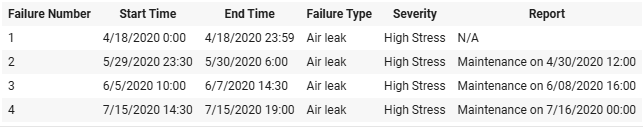




#**steps8**

**creating  our picure of failure data into dataframe after writing some code**

In [ ]:


# Creating a dictionary with the provided failure data
failure_data = {
    "Failure Number": [1, 2, 3, 4],
    "Start Time": ["4/18/2020 0:00", "5/29/2020 23:30", "6/5/2020 10:00", "7/15/2020 14:30"],
    "End Time": ["4/18/2020 23:59", "5/30/2020 6:00", "6/7/2020 14:30", "7/15/2020 19:00"],
    "Failure Type": ["Air leak"] * 4,
    "Severity": ["High Stress"] * 4,
    "Report": ["N/A", "Maintenance on 4/30/2020 12:00", "Maintenance on 6/08/2020 16:00", "Maintenance on 7/16/2020 00:00"]
}

# Converting dictionary to DataFrame
df_failures = pd.DataFrame(failure_data)

# Converting Start Time and End Time columns to datetime format
df_failures["Start Time"] = pd.to_datetime(df_failures["Start Time"])
df_failures["End Time"] = pd.to_datetime(df_failures["End Time"])

# Displaying the DataFrame
df_failures


,Failure Number,Start Time,End Time,Failure Type,Severity,Report
0,1,2020-04-18 00:00:00,2020-04-18 23:59:00,Air leak,High Stress,N/A
1,2,2020-05-29 23:30:00,2020-05-30 06:00:00,Air leak,High Stress,Maintenance on 4/30/2020 12:00
2,3,2020-06-05 10:00:00,2020-06-07 14:30:00,Air leak,High Stress,Maintenance on 6/08/2020 16:00
3,4,2020-07-15 14:30:00,2020-07-15 19:00:00,Air leak,High Stress,Maintenance on 7/16/2020 00:00


#**steps9**
**now  creating a new DataFrame (normal_op_df) by removing rows from an existing DataFrame (df) that correspond to time periods marked as "failure periods." The resulting DataFrame contains only the data from normal operation periods of the system.**

***Because***

**To Ensure Clean Data for Analysis:**

Data during failure periods may show erratic or extreme values that don't represent the system's normal operating behavior.

Including these rows might lead to biased results when analyzing trends or training models for prediction.

**Focus on Normal Patterns:**

*The goal of many analyses is to understand the system's "healthy" operating patterns to identify deviations (potential failures).
By removing failure periods, you isolate the data that represents the system's usual behavior.*

**Prevent Data Leakage:**

If the data will be used to train a predictive model, failure period data could inadvertently teach the model about failures it’s supposed to predict.
This can lead to data leakage, where the model performs well in training but fails in real-world predictions.

**Failure Periods Are Already Defined:**

The failure periods (start and end times) are already known and recorded in the df_failures DataFrame.
Including them might duplicate their influence on analysis if failure-specific insights are needed later.

**Prepare for Post-Failure Analysis:**

Once normal operation data is isolated, failure periods can be analyzed separately to study their causes, effects, or indicators.
This separation helps in performing root cause analysis or identifying early warning signs of failures.


In [ ]:
# Removing  those rows that occur during failed periods to create a dataframe of records during normal operation
normal_op_df = pd.DataFrame(df.loc[((df.index < df_failures['Start Time'][0]) | (df.index > df_failures['End Time'][0])) &
                                   ((df.index < df_failures['Start Time'][1]) | (df.index > df_failures['End Time'][1])) &
                                   ((df.index < df_failures['Start Time'][2]) | (df.index > df_failures['End Time'][2])) &
                                   ((df.index < df_failures['Start Time'][3]) | (df.index > df_failures['End Time'][3]))])


In [ ]:
#finding the shape of normal data frame after removing  failure dataframe timespan
normal_op_df.shape

(1486994, 15)

In [ ]:
# Calculate the number of rows removed during the filtering process
removed_rows = df.shape[0] - normal_op_df.shape[0]

# Display the number of removed rows
print(f"Number of removed rows: {removed_rows}")


Number of removed rows: 29954


#**steps10**

**Creating these specific DataFrames (week_df, hourly_df, and second_wise_df) is critical for analyzing and predicting failure events. Each DataFrame represents data leading up to a failure event, focusing on different granularities (day-level, hour-level, second-level). Here's why each is essential:**

***1. week_df:** One Week of Data Before Failure (Day-wise Timestamps)
Why?

*Identify Long-Term Trends:*

A week before a failure allows you to detect gradual changes or trends (e.g., decreasing oil level, increasing pressure) that may not be obvious in shorter time frames.

***Early Warning Indicators:***

Failures often build up over time. Studying a week of data can help identify early warning signs that occur days before the failure event.

**Anomalous Patterns:**

Long-term deviations from normal operation (e.g., abnormal energy consumption or temperature spikes) are better observed on a daily scale
Granularity:

Timestamps are recorded day-wise to simplify the representation of long-term data without making the DataFrame too large.

**2. hourly_df:**

 One Day of Data Before Failure (Hour-wise Timestamps)
Why because

***Capture Mid-Term Changes:***

The day leading up to the failure is critical because operational anomalies often become more pronounced closer to the failure.

**Hour-Level Trends:**

Hourly data provides more granularity compared to day-wise data. It helps track short-term patterns such as:
Fluctuations in pressure.
Spikes or dips in temperature.
Changes in energy usage.
Operational Context:

Helps correlate operational conditions (e.g., peak usage hours) with anomalies.
Granularity:
Timestamps are recorded hour-wise for detailed tracking without overwhelming the analysis.
**3. 10_second_wise_df:** One Hour of Data Before Failure (10-second Timestamps)

**Capture Immediate Pre-Failure Behavior:**

The last hour before a failure often exhibits critical signs of failure, such as:
Sudden pressure drops.
Unusual noise signals.
Equipment stress or overheating.
High-Resolution Data:

Second-level data (10-second intervals) is needed to capture rapid changes in system behavior that may indicate an imminent failure.

**Root Cause Analysis:**

Enables detailed analysis of the moments immediately before failure to identify the exact cause.
Granularity:
Timestamps are recorded at 10-second intervals for fine-grained analysis of short-term behavior.

**week_df that is  we are collecting time stamps span of  one week before failure day by day.**

In [ ]:
import pandas as pd


data = {
    'Failure Number': [1, 2, 3, 4],
    'Start Time': [
        pd.Timestamp('2020-04-18 00:00:00'),
        pd.Timestamp('2020-05-29 23:30:00'),
        pd.Timestamp('2020-06-05 10:00:00'),
        pd.Timestamp('2020-07-15 14:30:00')
    ]
}
df_failures = pd.DataFrame(data)

# Creating an empty list to store the data
week_data = []

# Iterating through each failure
for index, row in df_failures.iterrows():
    failure_number = row['Failure Number']
    start_time = row['Start Time']

    # Generating timestamps for 7 days before the failure start time
    for i in range(7):
        current_timestamp = start_time - pd.Timedelta(days=i)  # Full timestamp
        week_data.append([failure_number, current_timestamp])

# Creating a DataFrame with Failure Number and Timestamp only
week_df = pd.DataFrame(week_data, columns=['Failure Number', 'Timestamp'])

# Displaying the resulting DataFrame

week_df.shape
week_df.head()


,Failure Number,Timestamp
0,1,2020-04-18
1,1,2020-04-17
2,1,2020-04-16
3,1,2020-04-15
4,1,2020-04-14


In [ ]:
week_df.shape

(28, 2)

**hourly_df in which we are collecting one day data hour_wise  for every failure**

In [ ]:
import pandas as pd


data = {
    'Failure Number': [1, 2, 3, 4],
    'Start Time': [
        pd.Timestamp('2020-04-18 00:00:00'),
        pd.Timestamp('2020-05-29 23:30:00'),
        pd.Timestamp('2020-06-05 10:00:00'),
        pd.Timestamp('2020-07-15 14:30:00')
    ]
}
df_failures = pd.DataFrame(data)

# Creating an empty list to store the data
hourly_data = []

# Iterating through each failure
for index, row in df_failures.iterrows():
    failure_number = row['Failure Number']
    start_time = row['Start Time']

    # Generatng timestamps for 24 hours before the failure start time
    for i in range(24):
        current_time = start_time - pd.Timedelta(hours=i)
        hourly_data.append([failure_number, current_time])

# Creating a DataFrame with only Failure Type and Timestamp
hourly_df = pd.DataFrame(hourly_data, columns=['Failure Type', 'Timestamp'])

# Displaying the resulting DataFrame

hourly_df.head()


,Failure Type,Timestamp
0,1,2020-04-18 00:00:00
1,1,2020-04-17 23:00:00
2,1,2020-04-17 22:00:00
3,1,2020-04-17 21:00:00
4,1,2020-04-17 20:00:00


In [ ]:
hourly_df.shape

(96, 2)

**This code creates a DataFrame that generates second-wise data (10-second intervals) for one hour leading up to each failure. The primary goal is to analyze pre-failure data at a granular level.**

In [ ]:



data = {
    'Failure Number': [1, 2, 3, 4],
    'Start Time': [
        pd.Timestamp('2020-04-18 00:00:00'),
        pd.Timestamp('2020-05-29 23:30:00'),
        pd.Timestamp('2020-06-05 10:00:00'),
        pd.Timestamp('2020-07-15 14:30:00')
    ]
}
df_failures = pd.DataFrame(data)

# Create an empty list to store the data
second_wise_data = []

# Iterate through each failure
for index, row in df_failures.iterrows():
    failure_number = row['Failure Number']
    start_time = row['Start Time']

    # Generate timestamps for 10-second intervals within 1 hour before the failure start time
    for i in range(360):  # 360 intervals in one hour (60 minutes * 60 seconds / 10 seconds)
        current_time = start_time - pd.Timedelta(seconds=i*10)
        second_wise_data.append([failure_number, current_time])

# Create a DataFrame with only Failure Type and Timestamp
second_wise_df = pd.DataFrame(second_wise_data, columns=['Failure Type', 'Timestamp'])

# Display the resulting DataFrame
(second_wise_df).shape
second_wise_df.head()

,Failure Type,Timestamp
0,1,2020-04-18 00:00:00
1,1,2020-04-17 23:59:50
2,1,2020-04-17 23:59:40
3,1,2020-04-17 23:59:30
4,1,2020-04-17 23:59:20


In [ ]:
second_wise_df.shape

(1440, 2)

#**Steps11**
**Now we just taking overall idea about the our the normal_operation_dataframe
ie normal_op_df**

In [ ]:
normal_op_df.shape

(1486994, 15)

In [ ]:
normal_op_df.head(1)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01,-0.012,9.358,9.34,-0.024,9.358,53.6,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
normal_op_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1486994 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1486994 non-null  float64
 1   TP3              1486994 non-null  float64
 2   H1               1486994 non-null  float64
 3   DV_pressure      1486994 non-null  float64
 4   Reservoirs       1486994 non-null  float64
 5   Oil_temperature  1486994 non-null  float64
 6   Motor_current    1486994 non-null  float64
 7   COMP             1486994 non-null  float64
 8   DV_electric      1486994 non-null  float64
 9   Towers           1486994 non-null  float64
 10  MPG              1486994 non-null  float64
 11  LPS              1486994 non-null  float64
 12  Pressure_switch  1486994 non-null  float64
 13  Oil_level        1486994 non-null  float64
 14  Caudal_impulses  1486994 non-null  float64
dtypes: float64(15)
memory usage: 181.

#**steps12**
**Explanation of the Process**

This process involves preparing data for failure analysis by merging pre-failure time periods (week, day, hour) with a normal operation DataFrame. The aim is to identify when the measurements fall within these pre-failure periods and create binary indicators for analysis and model training. Here's the step-by-step explanation:

**1. Merge Failure Periods with Normal Operation Data**
For each failure, pre-failure periods such as one hour, one day, and one week before the failure start time are merged with the normal_op_df DataFrame.
This ensures that every record in the DataFrame is tagged with the hour/day/week timestamps if the measurement falls within the pre-failure period.

**2. Create Binary Columns for Pre-Failure Periods**

Three binary columns are added to the DataFrame to indicate whether a record falls within a specific pre-failure period:
week_pre_failure:
1: If the record is from one week before the failure.
0: If the record is outside this period.
day_pre_failure:
1: If the record is from one day before the failure.
0: If the record is outside this period.
hour_pre_failure:
1: If the record is from one hour before the failure.
0: If the record is outside this period.
Purpose: These columns simplify the identification of records that correspond to pre-failure conditions, making it easier to analyze trends and patterns.

**3. Merge Binary Columns into normal_op_df**

The binary columns are merged back into the normal_op_df DataFrame.
This ensures that the DataFrame now contains indicators for whether each record falls within a specific pre-failure period.

***Benefits of the Process***

**Easier Analysis:**

The binary columns provide a clear and simple way to identify whether a record matches a failure period.
This makes it easier to analyze patterns leading up to failures across different time scales (week, day, hour).

**Preparation for Model Training:**

These binary indicators can be used as features for predictive models.
Models can learn to distinguish between normal operation and pre-failure conditions, improving their accuracy.

**Verification:**

By examining the first few rows using .head(), you can quickly verify that the merging and binary column creation have been applied correctly.


In [ ]:
#  in normal_op_df add column week_df and week_pre_failure: 1 if the record is within the week before failure, 0 otherwise.

normal_op_df['week_df'] = 0

for index, row in week_df.iterrows():
    failure_time = row['Timestamp']
    # Check if the timestamp in normal_op_df is within one week before the failure
    start_of_week = failure_time - pd.Timedelta(days=7)
    within_week = normal_op_df.index[(normal_op_df.index >= start_of_week) & (normal_op_df.index < failure_time)]


    normal_op_df.loc[within_week, 'week_df'] = 1 #added for clarity, as 'week_df' column was not used before

In [ ]:
#  in normal_op_df add column hourly_df and add column second_wise_df  1 if the record is within hourly_df and second_wise_df  before failure, 0 otherwise.



normal_op_df['hourly_df'] = 0
normal_op_df['second_wise_df'] = 0

# Iterate through hourly_df
for index, row in hourly_df.iterrows():
    failure_time = row['Timestamp']
    # Check if the timestamp in normal_op_df is within one hour before the failure time in hourly_df
    start_of_hour = failure_time - pd.Timedelta(hours=1)
    within_hour = normal_op_df.index[(normal_op_df.index >= start_of_hour) & (normal_op_df.index < failure_time)]
    normal_op_df.loc[within_hour, 'hourly_df'] = 1

# Iterate through second_wise_df
for index, row in second_wise_df.iterrows():
    failure_time = row['Timestamp']
    # Check if the timestamp in normal_op_df is within one hour before the failure time in second_wise_df
    start_of_hour = failure_time - pd.Timedelta(hours=2)
    within_hour = normal_op_df.index[(normal_op_df.index >= start_of_hour) & (normal_op_df.index < failure_time)]
    normal_op_df.loc[within_hour, 'second_wise_df'] = 1

#**steps13**
** After the merging the before failure timestamps and lebelling of times stamps data we are seeing the normal_data_frame.**

In [ ]:
normal_op_df.head(1)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,week_df,hourly_df,second_wise_df
timestamp,,,,,,,,,,,,,,,,,,
2020-02-01,-0.012,9.358,9.34,-0.024,9.358,53.6,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0


**cheking the information of normal_op_df after the merging of the timespans**

In [ ]:
normal_op_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1486994 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1486994 non-null  float64
 1   TP3              1486994 non-null  float64
 2   H1               1486994 non-null  float64
 3   DV_pressure      1486994 non-null  float64
 4   Reservoirs       1486994 non-null  float64
 5   Oil_temperature  1486994 non-null  float64
 6   Motor_current    1486994 non-null  float64
 7   COMP             1486994 non-null  float64
 8   DV_electric      1486994 non-null  float64
 9   Towers           1486994 non-null  float64
 10  MPG              1486994 non-null  float64
 11  LPS              1486994 non-null  float64
 12  Pressure_switch  1486994 non-null  float64
 13  Oil_level        1486994 non-null  float64
 14  Caudal_impulses  1486994 non-null  float64
 15  week_df          1486994 non-null

#**steps14**

**hourly_df:**

Most records (1,458,326) are outside the hourly pre-failure period.
A smaller number (28,668) are within the hourly pre-failure period.

**second_wise_df:**

Almost all records (1,482,834) are outside the second-wise pre-failure period.
A very small number (4,160) fall within the second-wise pre-failure period.

**week_df:**

The majority of records (11,778,012) are outside the week pre-failure period.
A notable number (308,982) are within the week pre-failure period.




**Purpose of the Code**

This analysis helps quantify how many records fall within the pre-failure periods (hour, second, week).

It is useful for understanding the distribution of normal vs. pre-failure records, which aids in:

Data validation.
Feature analysis.
Model training for failure prediction.

In [ ]:
#  writing code for the values counts for the hourly_df

print(normal_op_df['hourly_df'].value_counts())
print(normal_op_df['second_wise_df'].value_counts())
print(normal_op_df['week_df'].value_counts())

hourly_df
0    1458326
1      28668
Name: count, dtype: int64
second_wise_df
0    1482834
1       4160
Name: count, dtype: int64
week_df
0    1178012
1     308982
Name: count, dtype: int64


**Creating Smaller DataFrames Based on Pre-Failure Periods**

**We Are Creating Smaller DataFrames Based on Pre-Failure Periods**

The purpose of creating smaller DataFrames (hour_pre_fail_df, day_pre_fail_df, week_pre_fail_df) is to focus the analysis on specific pre-failure periods (hour, day, and week) for efficient exploration, visualization, and model preparation. Here's a detailed explanation:

**1. To Isolate Pre-Failure Records**

Each smaller DataFrame contains only the records that fall within the specific pre-failure time range:

*hour_pre_fail_df:* Contains records for the hour before failure.

*day_pre_fail_df:* Contains records for the day before failure.

*week_pre_fail_df:* Contains records for the week before failure.

**Reason:**
 Pre-failure periods are critical for analyzing patterns and anomalies that may predict a failure.

**2. Efficient Analysis**

By isolating pre-failure data, we reduce the size of the dataset being analyzed.
This makes it:

Easier to visualize trends (e.g., sudden drops in pressure).

Faster to compute statistics or correlations within pre-failure periods.

**3. Focused Feature Engineering**

These smaller DataFrames allow us to focus on features that are most relevant for failure prediction.

**Example:**

Analyze how oil level, pressure, or temperature change within the hour before failure using hour_pre_fail_df.

**4. Simplified Model Training**

Many machine learning models benefit from training on focused data:
For predicting failures, training a model specifically on pre-failure data ensures it learns the patterns that occur before a failure.

Dividing data into hour, day, and week levels allows the creation of time-specific models, which might have better predictive accuracy.




In [ ]:
# Creating smaller df's of relevant periods
# This allows for more efficient analysis and plotting

hour_pre_fail_df = normal_op_df[normal_op_df['second_wise_df'] == 1]
day_pre_fail_df = normal_op_df[normal_op_df['hourly_df'] == 1]
week_pre_fail_df = normal_op_df[normal_op_df['week_df'] == 1]
print(hour_pre_fail_df.shape)
print(day_pre_fail_df.shape)
print(week_pre_fail_df.shape)




(4160, 18)
(28668, 18)
(308982, 18)


 **Creating DataFrames for Each Failure Period**

 similary we will create dataframe  for the different type of failure period such as failure_1 ,failure_2,failure_3,failure4

 *extracting data from the normal_op_df DataFrame for specific time periods before and between failure events. By segmenting the data based on failure timestamps, we can analyze how the system behaves during normal operation periods and the lead-up to failures*.

**failure_1_df:**Extracts all data up to the start time of the first failure **(2020-04-18 00:00:00)**
Includes records that occurred before the first failure.

**failure_2_df:**Extracts data between the end of the first failure **(2020-04-18 23:59:00)** and the start of the second failure **(2020-05-29 23:30:00).**
Includes normal operation data after the first failure and before the second failure.

**failure_3_df**Extracts data between the end of the second failure **(2020-05-30 06:00:00)** and the start of the third failure **(2020-06-05 10:00:00)**.

**failure_4_df:**Extracts data between the end of the third failure **(2020-06-07 14:30:00)** and the start of the fourth failure **(2020-07-15 14:30:00)**



***And we have also printed the shape of all the failure.***






In [ ]:
failure_1_df = normal_op_df[:'2020-04-18 00:00:00']  # Up to the start time of the first failure
failure_2_df = normal_op_df['2020-04-18 23:59:00':'2020-05-29 23:30:00']  # Between the end of failure 1 and start of failure 2
failure_3_df = normal_op_df['2020-05-30 06:00:00':'2020-06-05 10:00:00']  # Between the end of failure 2 and start of failure 3
failure_4_df = normal_op_df['2020-06-07 14:30:00':'2020-07-15 14:30:00']  # Between the end of failure 3 and start of failure 4
print(failure_1_df.shape)
print(failure_2_df.shape)
print(failure_3_df.shape)
print(failure_4_df.shape)

(562564, 18)
(269519, 18)
(47710, 18)
(262968, 18)


#**steps16**

**Creating Binary Features in normal_op_df**

**Segmentation of Time Periods:**

Binary features (failure_1, failure_2, etc.) mark specific time periods between known failure events.
These markers separate operational data into distinct phases, such as before, during, or after failures.

**Facilitating Statistical Analysis:**

Enables evaluation of aggregate statistics for key variables during different periods.
Helps identify patterns, anomalies, or trends that are linked to system performance near failure events.

**Supporting Predictive Modeling:**

These features act as indicators for machine learning models, allowing the system to learn behaviors associated with failures.
Helps in predicting future failures by identifying early signs or triggers in the data.

**Comparison Between Failure and Non-Failure Periods:**

Provides a clear way to compare system behavior during normal operations versus failure-related periods.
Highlights deviations or changes that might signal underlying issues or potential failure risks.

**Simplified Filtering and Visualization:**

Binary columns make it easy to filter and visualize data for specific time periods without repeatedly applying time-based filters.
Simplifies exploratory data analysis (EDA) and aids in spotting correlations or trends.

**Verification and Validation:**

Verification steps ensure that binary features correctly identify the intended periods.
Checking shapes and values confirms that the feature creation aligns with the expected dataset structure.
This structured approach enhances both data analysis and predictive insights by leveraging temporal segmentation.

In [ ]:
# Creating binary features in the main model df where 1 indicates a record in period between prior failure_end and subsequent failure_start

# Creating binary features in normal_op_df
normal_op_df['failure_1'] = normal_op_df.index < '2020-04-18 00:00:00'
normal_op_df['failure_2'] = (normal_op_df.index > '2020-04-18 23:59:00') & (normal_op_df.index < '2020-05-29 23:30:00')
normal_op_df['failure_3'] = (normal_op_df.index > '2020-05-30 06:00:00') & (normal_op_df.index < '2020-06-05 10:00:00')
normal_op_df['failure_4'] = (normal_op_df.index > '2020-06-07 14:30:00') & (normal_op_df.index < '2020-07-15 14:30:00')

# Displaying the first few rows for verification
print(normal_op_df[['failure_1', 'failure_2', 'failure_3', 'failure_4']].head())
verification=normal_op_df[['failure_1', 'failure_2', 'failure_3', 'failure_4']]
verification.shape

                     failure_1  failure_2  failure_3  failure_4
timestamp                                                      
2020-02-01 00:00:00       True      False      False      False
2020-02-01 00:00:10       True      False      False      False
2020-02-01 00:00:19       True      False      False      False
2020-02-01 00:00:29       True      False      False      False
2020-02-01 00:00:39       True      False      False      False


(1486994, 4)

#**Counting the occurrences of 1s and 0s in the 'failure_1' column**

In [ ]:
# Counting the occurrences of 1s and 0s in the 'failure_1' column
print(normal_op_df['failure_1'].value_counts())
#similary for the other failure columns
print(normal_op_df['failure_2'].value_counts())
print(normal_op_df['failure_3'].value_counts())
print(normal_op_df['failure_4'].value_counts())

failure_1
False    924430
True     562564
Name: count, dtype: int64
failure_2
False    1217475
True      269519
Name: count, dtype: int64
failure_3
False    1439284
True       47710
Name: count, dtype: int64
failure_4
False    1224026
True      262968
Name: count, dtype: int64


#**steps17**--**Exploratory Data Analysis**
The provided code snippet calculates the correlation matrix for the normal_op_df dataframe and prints the correlations between specific columns (week_df, hourly_df, second_wise_df) and other features in the dataframe.


**Purpose of Correlation Analysis here:**


***Identify Relationships Between Features:***

Correlation analysis helps identify the strength and direction of the relationship between different features in the dataset.
For example, if week_df has a strong positive or negative correlation with another feature, it indicates that these two variables are related in some meaningful way.

**Feature Selection for Predictive Models:**

Strongly correlated features are often significant predictors in machine learning models.
Understanding correlations allows you to focus on features that are most relevant for predicting outcomes like failures or abnormal behaviors.

**Detect Multicollinearity:**

If two features are highly correlated with each other, it can cause issues like multicollinearity in predictive modeling.
This analysis helps identify such relationships, enabling you to drop or combine redundant features.

**Understand Temporal Patterns:**

Features like week_df, hourly_df, and second_wise_df are likely derived from temporal data (weekly, hourly, second-wise trends).
Correlation analysis helps evaluate how these time-based features are related to other operational metrics or failure indicators.

**Support Failure Analysis:**

Correlations between week_df, hourly_df, or second_wise_df and other features can reveal patterns or triggers associated with failures.
For example, a strong correlation between hourly_df and a sensor reading might indicate specific hours when the system is prone to anomalies.

**Guide Feature Engineering:**

Correlations provide insights into relationships that might not be immediately obvious.
These insights can guide the creation of new derived features that improve model performance or help uncover hidden patterns.

**Prioritize Feature Importance:**

Sorting correlations by magnitude allows you to prioritize which features to focus on for further analysis or visualization.
For example, you can target features with the strongest correlations to key metrics for deeper investigation.

**Simplify Data Visualization:**

Correlation values make it easier to identify patterns without needing to plot every pair of features.
This reduces the complexity of exploratory data analysis (EDA).




In [ ]:
# Calculate the correlation matrix for normal_op_df
corr = normal_op_df.corr()

# Print correlations for 'pre_fail_week', 'pre_fail_day', and 'pre_fail_hour'
for col in ['week_df', 'hourly_df', 'second_wise_df']:
    print(f'\nCorrelations between {col} and features:\n')
    print(corr[col].sort_values(ascending=False))



Correlations between week_df and features:

week_df            1.000000
failure_3          0.355500
hourly_df          0.273766
Oil_temperature    0.153400
Oil_level          0.149240
failure_4          0.126524
failure_2          0.120367
Caudal_impulses    0.110636
second_wise_df     0.103421
DV_pressure        0.097010
Motor_current      0.048413
DV_electric        0.039868
TP2                0.038367
LPS                0.019498
Pressure_switch   -0.024818
Reservoirs        -0.040450
TP3               -0.040455
MPG               -0.045351
H1                -0.048442
Towers            -0.050015
COMP              -0.052235
failure_1         -0.079863
Name: week_df, dtype: float64

Correlations between hourly_df and features:

hourly_df          1.000000
second_wise_df     0.377771
week_df            0.273766
failure_3          0.216365
Oil_level          0.031496
failure_2          0.028818
Oil_temperature    0.023798
Caudal_impulses    0.018942
failure_4          0.014295
Motor_curr

#**steps18**
**interpretaion from the correlations**

***One Week Before Failure:***

**Oil Temperature**: Elevated oil temperature is a sign of stress on the system.

**Low Oil Level Signal:** Consistently low oil levels indicate potential issues leading to failure.

**Pressure Switch:** Shows a negative correlation, possibly reflecting abnormal system behavior.

**Caudal Impulses:** High caudal impulses suggest increased air movement, indicating stress or strain.



***One Day Before Failure:***

**Oil Temperature:** Remains elevated, pointing to system overheating as a precursor to failure.

**Low Oil Level Signal:** Low oil level continues to be an important indicator.

**Caudal Impulses:** High air volume movement continues, showing increased activity and stress in the system.


**One Hour Before Failure:**

**DV Pressure:** A decrease in DV pressure suggests the system is operating under significant load.

**COMP (Compressor):** Shows a negative correlation, indicating potential stress on the compressor.

**MPG (Main Pressure Gauge):** Negative correlation here also points to abnormal operating conditions.




***Key Observations:***
The APU (Auxiliary Power Unit) system, when operating for an extended period (a week or a day) under high oil temperature, low oil levels, and high air movement, experiences increased stress.

In the hour before failure, features such as DV pressure, compressor pressure, and DV electric values shift, reflecting that the system is under significant load.

The rising DV electric and compressor pressure values indicate the system is operating close to its limits.

In [ ]:
oiltemp_mean_comparison = normal_op_df.groupby('week_df')['Oil_temperature'].mean()
oiltemp_mean_comparison

,Oil_temperature
week_df,
0,61.888252
1,64.270368


***Oil Level – the electrical signal that detects the oil level on the compressor; it is active when the oil is below the expected values.***

***During the week pre failure the rate of Low Oil Signals is ~11.5 times higher than during normal operation.***

In [ ]:
oil_level_counts = normal_op_df.groupby('week_df')['Oil_level'].value_counts()
normal_op_oil_level_ratio = oil_level_counts[0][1] / oil_level_counts[0][0]
pre_fail_week_oil_level_ratio = oil_level_counts[1][1] / oil_level_counts[1][0]

print('Low Oil Level ratio during Normal Operation:'+f'{normal_op_oil_level_ratio}'+'\n\n'+'Low Oil Level ratio during Week Pre Failure: '+f'{pre_fail_week_oil_level_ratio}')
print('\n',oil_level_counts)

Low Oil Level ratio during Normal Operation:7.301412917092421

Low Oil Level ratio during Week Pre Failure: 88.1465666474322

 week_df  Oil_level
0        1.0          1036107
         0.0           141905
1        1.0           305516
         0.0             3466
Name: count, dtype: int64


**week_df Column:**

***This column categorizes the data into two groups:***

0: Represents normal operation (no failure condition).

1: Represents the week leading up to a failure.

**Oil_level Column:**

***Represents the status of the oil level:***

1.0: Low oil level.

0.0: Normal oil level.
Counts:



**Pressure Switch** - the electrical signal that detects the discharge in the air-drying towers.

The rate of pressure switch activations during the week pre failure is ~1.76 higher than during normal operation. Another indicator of the system operating under load.

In [ ]:
pswitch_counts = normal_op_df.groupby('week_df')['Pressure_switch'].value_counts()
normal_op_pswitch_ratio = pswitch_counts[0][0] / pswitch_counts[0][1]
pre_fail_week_pswitch_ratio = pswitch_counts[1][0] / pswitch_counts[1][1]

print('Pressure Switch ratio during Normal Operation:'+f'{normal_op_pswitch_ratio}'+'\n\n'+'Pressure Switch ratio during Week Pre Failure: '+f'{pre_fail_week_pswitch_ratio}')
print('\n',pswitch_counts)

Pressure Switch ratio during Normal Operation:0.007509202621891977

Pressure Switch ratio during Week Pre Failure: 0.013284972665947378

 week_df  Pressure_switch
0        1.0                1169232
         0.0                   8780
1        1.0                 304931
         0.0                   4051
Name: count, dtype: int64


**Caudal Impulse** – the electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.

The sum of the caudal impulse values over a time period serve as a surrogate for the volume of air flowing through the APU to the reservoirs. When this summed value is higher, the APU is operating under higher load.

During the week pre failure the rate of caudal impulses is almost double (12.3x) that of during normal operation. This indicates a higher rate of the system operating under load.



In [ ]:
caudal_counts = normal_op_df.groupby('week_df')['Caudal_impulses'].value_counts()
normal_op_caudal_ratio = caudal_counts[0][1] / caudal_counts[0][0]
pre_fail_week_caudal_ratio = caudal_counts[1][1] / caudal_counts[1][0]

print('Caudal Impulse ratio during Normal Operation:'+f'{normal_op_caudal_ratio}'+'\n\n'+'Caudal Impulse ratio during Week Pre Failure: '+f'{pre_fail_week_caudal_ratio}')
print('\n',caudal_counts)

Caudal Impulse ratio during Normal Operation:11.81562228024369

Caudal Impulse ratio during Week Pre Failure: 88.1465666474322

 week_df  Caudal_impulses
0        1.0                1086092
         0.0                  91920
1        1.0                 305516
         0.0                   3466
Name: count, dtype: int64


I have focused on identifying the features correlated with the week pre failure, as that is feasible to put into operation. Since there are more records than an hour or day pre failure, and leaves enough time for an early warning indicator to activate, remote verification of the early warning state, and physical inspection/maintenance of the onboard APU system.

The highest correlations with the hour pre failure status are different than those correlated with a week/day pre failure. I will examine these relationships to identify if there is a possibility of developing an acute failure warning given live updates of these measurements.

There are only 1387 records during the hour leading up to the 4 failures, and as such the findings are experimental but may be useful for predicting acute failure in the very near future.

DV pressure (bar) – the measure of the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.

The average DV pressure value is significantly higher during the hour leading up to failure. As stated, a zero reading indicates the compressor operating under load, so this is not indicative of the system operating under higher load, but does indicate a more extreme change of pressure within the system.

In [ ]:
dv_pressure_avg = normal_op_df.groupby('hourly_df')['DV_pressure'].mean()
dv_pressure_avg

,DV_pressure
hourly_df,
0,0.020033
1,-0.001444


COMP - the electrical signal of the air intake valve on the compressor; it is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.

The signal of the air intake valve on the compressor is active 64% of the time during the hour pre failure, compared to 17% of the time during normal operation

In [ ]:
comp_counts = normal_op_df.groupby('hourly_df')['COMP'].value_counts()
normal_op_comp_ratio = comp_counts[0][0] / comp_counts[0][1]
pre_fail_hour_comp_ratio = comp_counts[1][0] / comp_counts[1][1]

print('COMP ratio during Normal Operation:'+f'{normal_op_comp_ratio}'+'\n\n'+'COMP ratio during Hour Pre Failure: '+f'{pre_fail_hour_comp_ratio}')
print('\n',comp_counts)

COMP ratio during Normal Operation:0.1701177960165513

COMP ratio during Hour Pre Failure: 0.236755823986195

 hourly_df  COMP
0          1.0     1246307
           0.0      212019
1          1.0       23180
           0.0        5488
Name: count, dtype: int64


MPG – the electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes the same behaviour as the MPG sensor.

As stated, the MPG signal assumes the same behavior as the COMP signal previously investigated. Shown below, these ratios are almost identical to the COMP ratios and one of these features will be removed before training any model.



In [ ]:
mpg_counts = normal_op_df.groupby('hourly_df')['MPG'].value_counts()
normal_op_mpg_ratio = mpg_counts[0][0] / mpg_counts[0][1]
pre_fail_hour_mpg_ratio = mpg_counts[1][0] / mpg_counts[1][1]

print('COMP ratio during Normal Operation:'+f'{normal_op_mpg_ratio}'+'\n\n'+'COMP ratio during Hour Pre Failure: '+f'{pre_fail_hour_mpg_ratio}')
print('\n',mpg_counts)

COMP ratio during Normal Operation:0.17626381780858932

COMP ratio during Hour Pre Failure: 0.236755823986195

 hourly_df  MPG
0          1.0    1239795
           0.0     218531
1          1.0      23180
           0.0       5488
Name: count, dtype: int64


#**steps19**
***Now  we will examine some relationships between features that could indicate an abnormality in system operation, given my limited knowledge about this machinery.***

*For example, the difference in pressure between the pneumatic panel and downstream reservoirs should ideally be close to zero. Any value deviating from zero suggests that there is pressure loss in the system.*

***The pressure measured at the reservoirs should be similar to the pressure measured at the pneumatic panel. Here, we will analyze the difference between these two pressures and compare the average size of the difference during:***

*Normal operation*

*The week before failure*

*The day before failure*

*The hour before failure**

**Observations:**

***Week Leading to Failure:***

The average size of the pressure difference between normal operation and the week leading to failure is quite small.
No major abnormality is observed, but there is a slight increase, which may indicate the onset of stress in the system.

***Day Before Failure:***

The pressure difference shows a noticeable increase and becomes positive.
This suggests that some abnormal behavior is occurring in the system.

***Hour Before Failure:***

The pressure difference increases further but now becomes negative.
A negative value indicates pressure loss between the pneumatic panel and the downstream reservoirs, highlighting a significant issue in the system.

In [ ]:
# Creating a column of the difference in air pressure between the pneumatic panel and the reservoirs
normal_op_df['air_pressure_diff'] = normal_op_df['TP3'] - normal_op_df['Reservoirs']

air_press_diff_week = normal_op_df.groupby('week_df')['air_pressure_diff'].mean()
print("Reservoir minus Pneumatic Panel Pressure Average: Pre Fail Week vs Normal: "+f'{air_press_diff_week[0]-air_press_diff_week[1]:.20f}'+'\n')

air_press_diff_day = normal_op_df.groupby('hourly_df')['air_pressure_diff'].mean()
print("Reservoir minus Pneumatic Panel Pressure Average: Pre Fail Day vs Normal: "+f'{air_press_diff_day[0]-air_press_diff_day[1]}'+'\n')

air_press_diff_hour = normal_op_df.groupby('second_wise_df')['air_pressure_diff'].mean()
print("Reservoir minus Pneumatic Panel Pressure Average: Pre Fail Hour vs Normal: "+f'{air_press_diff_hour[0]-air_press_diff_hour[1]}')

Reservoir minus Pneumatic Panel Pressure Average: Pre Fail Week vs Normal: 0.00008693329900326635

Reservoir minus Pneumatic Panel Pressure Average: Pre Fail Day vs Normal: -0.00019501495345054277

Reservoir minus Pneumatic Panel Pressure Average: Pre Fail Hour vs Normal: -0.0005192584099096728


#steps20 Initial Model Training + Evaluation
**steps in the Analysis**: But before model training we will analyse our feature which one is more important or which one is less

**Identifying Highly Correlated Features:**

First, we list the features that *have a correlation higher than 0.75.*
If two or more features are highly correlated, one or more of them may need to be dropped, as retaining both is unnecessary and could lead to overfitting.

**Feature Selection:**

When two features are highly correlated, a decision is made about which feature to keep and which to drop.
This decision is based on:
The business relevance of the feature.
The importance of the feature for the predictive model.

**Plotting the Heatmap:**

A heatmap of the highly correlated features is created to visualize the relationships.
The heatmap uses colors to represent the strength and direction of correlations:
Dark colors (near 1): Indicate a strong positive correlation.
Light colors (near 0): Indicate a weak or no correlation.

**Purpose of This Analysis:**

Avoid Redundancy: Highly correlated features introduce redundancy into the model, as they provide similar information.
Improve Model Performance: Dropping unnecessary features improves the model’s efficiency, reduces overfitting, and simplifies interpretation.
Simplify the Dataset: Retaining only relevant and non-redundant features makes the dataset cleaner and easier to work with.

**Final Visualization:**
Feature List: A list of features with high correlation (> 0.75) is prepared for reference.
Heatmap: The correlations are visualized using a heatmap, making it easier to identify which features are redundant and require attention.
This process ensures that only the most relevant and non-redundant features are retained in the dataset, which ultimately enhances the performance and interpretability of the predictive model.

TP2            0.942886
TP3            0.999993
H1             0.968176
Reservoirs     0.999993
COMP           0.982828
DV_electric    0.942886
MPG            0.982828
dtype: float64


<Axes: >

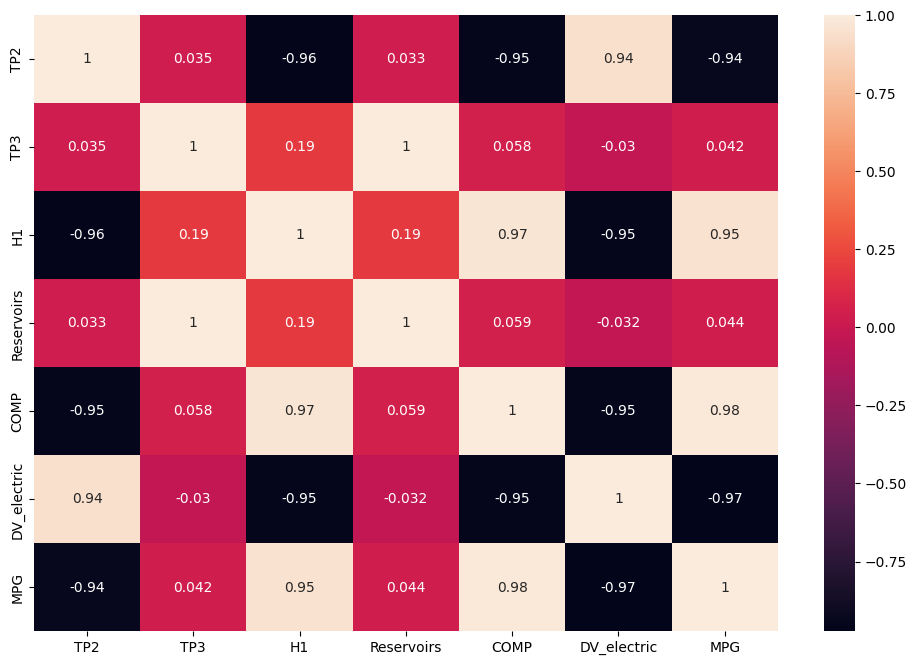

In [ ]:
plt.figure(figsize=(12,8))

# This calculates the correlation between each feature and all of the others
corr = normal_op_df.corr()

# Selecting only correlations greater than 0.75 and not 1, which indicates a features correlation with itself
temp = corr[(corr>0.75)&(corr!=1)].abs().max()
print(temp[~temp.isna()])

corr_small = normal_op_df[['TP2','TP3','H1','Reservoirs','COMP','DV_electric','MPG']].corr()

# Creating and plotting the heatmap with seaborn
sns.heatmap(corr_small, annot=True)

#**steps21**
***information and analysis of features***

***information about the features***
*TP2 (bar) *– the measure of the pressure on the compressor.

*TP3 (bar)* – the measure of the pressure generated at the pneumatic panel.

*H1 (bar) –* the measure of the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs.

*Reservoirs (bar) *– the measure of the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).

*COMP* - the electrical signal of the air intake valve on the compressor; it is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.

*DV electric* – the electrical signal that controls the compressor outlet valve; it is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.

*MPG* – the electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production
unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes the same behaviour as the MPG sensor.

**Given the description of the values of these features, we approached each column:**

***TP2*** - is the actual measure of the pressure on the compressor, which is very important to keep.

***TP3*** - measures pressure at the panel, and any difference between this and the Reservoirs value is very small (thus the high correlation) but the differences are very important as any difference indicates pressure loss in the system and a potential leak.

***H1*** - This column is highly correlated with multiple features, and as evaluated previously, is not correlated with any of the pre failure indicators.

***Reservoirs*** - As stated with TP3, the relationship between these two is too important to drop either column.

***COMP*** - This sensor is active when the MPG sensor is active, we will drop this feature as the MPG activates based on an actual measurement of pressure, which then activates the COMP sensor.

***DV_electric*** - The behavior of this feature can be quantified by the MPG feature that we are keeping, so we will drop this column.

***MPG*** - as stated above, we will keep this feature in the data.

In [ ]:
# Dropping the highly correlated columns
model_df = normal_op_df.drop(columns=['H1', 'COMP','DV_electric'])

***so First, saving the datetime index is important for feature generation and time-based analysis.***

***For model training, removing the datetime index is necessary to prevent data leakage and ensure that the model performs accurately in real-world scenarios.***

In [ ]:
# Resetting the index to sequential integers and dropping the datetime column entirely, saving a df with datetime index for later feature generation.
model_with_dt = model_df
model_df = model_df.reset_index(drop=True)
model_df.head()


,TP2,TP3,DV_pressure,Reservoirs,Oil_temperature,Motor_current,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,week_df,hourly_df,second_wise_df,failure_1,failure_2,failure_3,failure_4,air_pressure_diff
0,-0.012,9.358,-0.024,9.358,53.600,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
1,-0.014,9.348,-0.022,9.348,53.675,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
2,-0.012,9.338,-0.022,9.338,53.600,0.0425,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
3,-0.012,9.328,-0.022,9.328,53.425,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0
4,-0.012,9.318,-0.022,9.318,53.475,0.0400,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,True,False,False,False,0.0


In [ ]:
model_df.shape

(1486994, 20)

#**steps22**
**Preparing the data for model training.**

Here, we are preparing the data for model training. This process involves separating the features (X) and the target (y), splitting the data into train and test sets, and standardizing the feature values to optimize the training process.

**Steps in Data Preparation:**

*Subsetting the Dataframe:*

Select only the columns needed for X (features).

Exclude failure-related columns intentionally, as including them could lead to bias or data leakage.

Setting the Target (y):

Set the target variable (y) as pre_fail_week.

The model will be trained to predict whether the system is close to failure or not.

*Splitting Data into Train and Test Sets:*

Split the dataset into training and testing sets.
Use stratification based on the y column because the classes (failure and non-failure) are imbalanced.
Stratification ensures that the proportion of target classes remains consistent in both the train and test sets.

*Scaling the Features:*

Fit Scikit-learn's Standard Scaler on the X_train data.
Purpose of Standardization: Brings all features to a common scale (mean = 0, standard deviation = 1).

*Transform both X_train and X_test:*
Ensures that feature values are consistent during training and testing.

In [ ]:
# Creating the X data from the pertinent columns of the model ready dataframe
X = model_df[['TP2','TP3','Reservoirs','Oil_temperature','Motor_current','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses']]

# Declaring the target column of pre_fail_week as the y or target data
y = model_df['week_df']

# Splitting the data into training and testing, stratifying by the y variable of pre_fail_hour as it has greatly imbalanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Using scikit learn's StandardScaler, fitting it on only the X_train data, then transforming both X_train and X_test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Checking the counts of True/False values in the training and test target datasets
print(y_train.value_counts())
print(y_test.value_counts())

week_df
0    824608
1    216287
Name: count, dtype: int64
week_df
0    353404
1     92695
Name: count, dtype: int64


#**steps23**
*we are using a **Logistic Regression model** from the scikit-learn library. Logistic Regression is a simple and effective algorithm suitable for binary classification tasks.*

**Process Explanation:**

***Why Logistic Regression?***

**Binary Target Prediction**
 Logistic Regression is designed for binary categorical targets (e.g., predicting whether a failure will occur or not).

**Probability Output** It predicts a probability between 0 and 1, indicating how likely a record belongs to a specific class.

**Classification:** If the predicted probability exceeds a threshold (e.g., 0.5), the model classifies the record as "failure"; otherwise, "no failure."

**Training and Prediction:**

The model is trained on X_train (features) and y_train (target labels).
Once trained, predictions are generated for the X_test dataset.
These predictions are compared with y_test to evaluate the model's performance.

**Evaluating Performance:**

The model's performance is assessed using the following metrics:
**Accuracy:** Measures the percentage of total correct predictions.

**Precision:** Measures how many of the positively predicted records are actually positive.

**Recall:** Measures how many actual positive records the model successfully identified.

**F1 Score:** A balance between precision and recall, useful for imbalanced datasets.

**Plotting Important Features:**

Logistic Regression assigns a coefficient to each feature, representing its importance in the prediction.
These coefficients are visualized to understand which features contribute most to the failure prediction.

**Why This Approach?**

***This approach is simple yet effective because:***

*-It helps understand the reasons behind system failures and identifies the most important features.

*-It provides quick and interpretable results, forming a strong foundation for further advanced modeling.

*-It allows easy evaluation of the model's performance and optimization potential.










Accuracy: 0.7886948861127239
Precision: 0.4150595882990249
Recall: 0.041329090026430766
F1 Score: 0.7133359774875245


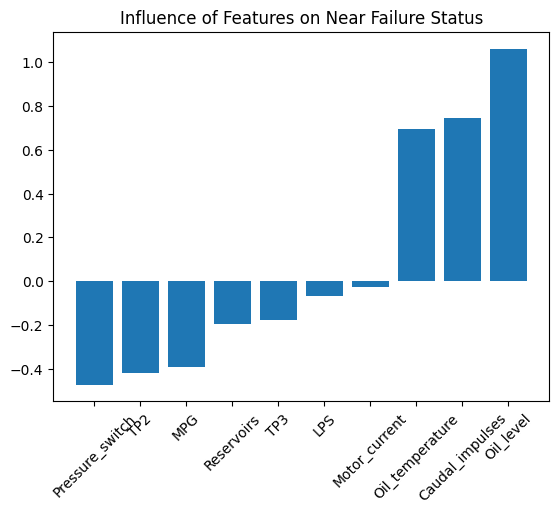

In [ ]:
 #Initiating a scikit-learn Logistic Regression model with class weights set to counteract the imbalanced target classes
logreg_1 = LogisticRegression(random_state=17)

# Fitting the model with the training data
logreg_1.fit(X_train, y_train)

# Predicting target values from the test data
y_pred = logreg_1.predict(X_test)

# Accessing the feature_importances of the model after fitting
feature_importances = pd.DataFrame(data={"Feature": X.columns, "Importance": logreg_1.coef_[0]}).sort_values(by='Importance')

# Calculating and printing model evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plotting the feature importances as a bar chart
plt.bar(feature_importances["Feature"], feature_importances["Importance"])
plt.xticks(rotation=45)
plt.title("Influence of Features on Near Failure Status")
plt.show()

#**steps24**
Now, we evaluate XGBClassifier, a classification model from XGBoost. It is an advanced classification algorithm that is expected to perform better than Logistic Regression for binary classification tasks, especially when dealing with complex data.

**Why we have Used XGBClassifier**

**Improved Performance:**

XGBoost performs better than Logistic Regression, especially with complex or non-linear data.
Its boosting technique combines weak models to create strong and accurate predictions.

**Flexibility and Robustness:**

XGBoost effectively handles missing values, outliers, and large datasets.
It makes it easy to highlight feature importance, which helps in understanding the reasons behind failures.

**Advanced Evaluation:**

Metrics like Log Loss and ROC-AUC Score provide deeper insights into the reliability of the model’s predictions.








              precision    recall  f1-score   support

           0       0.82      0.99      0.89    353404
           1       0.82      0.14      0.24     92695

    accuracy                           0.82    446099
   macro avg       0.82      0.57      0.57    446099
weighted avg       0.82      0.82      0.76    446099

0.3998747822574337
0.7966753352709482


<Axes: xlabel='Weight', ylabel='Feature'>

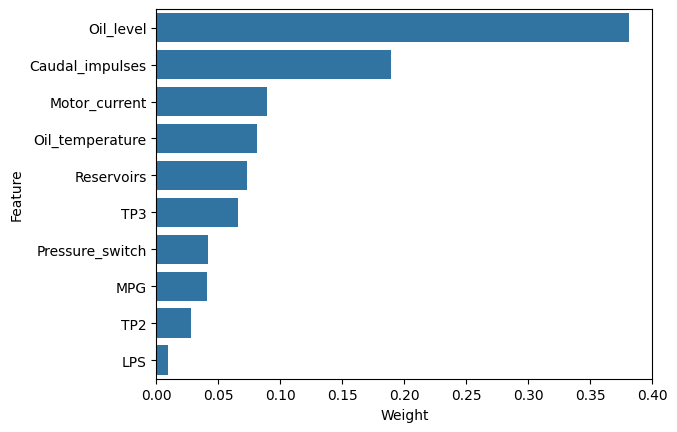

In [ ]:
# Instantiating an XGBoost Classifier model for binary classification via logistic regression (this model needs work)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=17)

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions of near failure True/False on the test data
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)
# Using scikit-learn's classification report to calculate and display model evaluation metrics
print(classification_report(y_test, y_pred))

# Calculate log loss
print(log_loss(y_test, y_pred_proba))

# Calculate ROC AUC
print(roc_auc_score(y_test, y_pred_proba[:,1]))

# extracts the feature importances from the xgb_model, appends the column names to them as a dataframe and plots them as a barplot
important_features = pd.DataFrame(data=zip(X.columns, xgb_model.feature_importances_), columns=["Feature","Weight"])

sns.barplot(data=important_features, x="Weight",y="Feature", order=important_features.sort_values("Weight", ascending=False).Feature)

#**steps25**
To improve the performance of the XGBoost classifier, new features are generated using rolling statistics.

**Oil Level Rolling Sum:**

Tracks the frequency of low oil level indications over hour, day, and week windows.
Helps identify patterns of repeated low oil levels, signaling potential failures.

**Oil Temperature Rolling Average:**

Calculates the average oil temperature over hour, day, and week windows.
Captures overheating trends and smoothens short-term temperature fluctuations.

**Motor Current Rolling Average:**

Uses a 3-day window to track periods of consecutive heavy use.
Highlights abnormal stress on the motor over extended periods.

**Pressure Difference and Rolling Averages:**

Tracks the difference between the pneumatic panel and downstream reservoir pressures.
Rolling averages over day and week windows capture consistent pressure loss patterns.

**These features enhance the model by:**

Capturing time-based patterns and stress periods.
Highlighting system abnormalities and failure trends.
Providing more informative inputs, improving prediction accuracy and reliability.


In [ ]:
model_with_dt['Oil_level_rolling_sum_hour'] = model_with_dt['Oil_level'].rolling(window=pd.Timedelta(hours=1)).sum().fillna(0)
model_with_dt['Oil_level_rolling_sum_day'] = model_with_dt['Oil_level'].rolling(window=pd.Timedelta(days=1)).sum().fillna(0)
model_with_dt['Oil_level_rolling_sum_week'] = model_with_dt['Oil_level'].rolling(window=pd.Timedelta(weeks=1)).sum().fillna(0)

model_with_dt['Oil_temp_rolling_avg'] = model_with_dt['Oil_temperature'].rolling(window=pd.Timedelta(hours=1)).mean().fillna(0)
model_with_dt['Oil_temp_rolling_avg_day'] = model_with_dt['Oil_temperature'].rolling(window=pd.Timedelta(days=1)).mean().fillna(0)
model_with_dt['Oil_temp_rolling_avg_week'] = model_with_dt['Oil_temperature'].rolling(window=pd.Timedelta(weeks=1)).mean().fillna(0)

model_with_dt['motor_current_rolling_avg'] = model_with_dt['Motor_current'].rolling(window=pd.Timedelta(days=3)).mean().fillna(0)

model_with_dt['panel_reservoir_diff'] = model_with_dt['TP3'] - model_with_dt['Reservoirs']
model_with_dt['pnl_res_dif_rlng_avg_day']=  model_with_dt['panel_reservoir_diff'].rolling(window=pd.Timedelta(days=1)).mean().fillna(0)
model_with_dt['pnl_res_dif_rlng_avg_week']=  model_with_dt['panel_reservoir_diff'].rolling(window=pd.Timedelta(weeks=1)).mean().fillna(0)

#**step26_model improvments**
we will code to prepares optimized training and testing data for the XGBoost classifier by including new features and scaling the data. As a result, the model performs significantly better, capturing time-based patterns and delivering accurate predictions. The purpose is to make the data informative and suitable for the model, leading to better performance and reliability.

In [ ]:
# Creating the X data from the pertinent columns of the model ready dataframe
X2 = model_with_dt[['TP3','Reservoirs','LPS','Oil_level', 'Oil_level_rolling_sum_week','Oil_temperature','Oil_temp_rolling_avg_day','Oil_temp_rolling_avg_week', 'panel_reservoir_diff','pnl_res_dif_rlng_avg_day','pnl_res_dif_rlng_avg_week']]

# Declaring the target column of pre_fail_week as the y or target data
y2 = model_with_dt['week_df']

# Splitting the data into training and testing, stratifying by the y variable of pre_fail_hour as it has greatly imbalanced class distribution
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, stratify=y2)

# Using scikit learn's StandardScaler, fitting it on only the X_train data, then transforming both X_train and X_test data
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

The XGBoost Classifier improved after including the generated features. Lowering the log loss error from ~.41 to ~.035 and increasing the roc_auc_score from ~0.79 to ~0.99.

#**step27**
now we will implement an XGBoost Classifier model for a binary classification task. The purpose is to predict system failure and evaluate the model’s performance using various metrics.

 A classification report will generated, which includes metrics such as:

*Precision*: Proportion of predicted positives that are actually positive.

*Recall*: Proportion of actual positives correctly identified by the model.

*F1 Score*: A balance between precision and recall.

*Accuracy:* The percentage of total correct predictions.

**Why Are We Doing This?**

**Model Training:**

The model is trained to predict system failure, which is essential for critical systems requiring early failure detection.

**Performance Evaluation:**

Metrics such as precision, recall, F1 score, and accuracy help evaluate the model’s classification performance.

Log loss assesses the quality of probability predictions.

ROC AUC evaluates the model’s classification ability across thresholds, which is critical for imbalanced datasets.

**Model Improvement:**

Evaluating performance helps identify areas for improvement, such as tweaking hyperparameters or adding more features to the dataset.





In [ ]:


# Instantiating an XGBoost Classifier model for binary classification
xgb_model2 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=17)

# Fitting the model to the training data
xgb_model2.fit(X_train2, y_train2)

# Making predictions of near failure True/False on the test data
y_pred2_xgb = xgb_model2.predict(X_test2)
y_pred_proba2 = xgb_model2.predict_proba(X_test2)

# Using scikit-learn's classification report to calculate and display model evaluation metrics
print(classification_report(y_test2, y_pred2_xgb))

# Calculate log loss
print(log_loss(y_test2, y_pred_proba2))

# Calculate ROC AUC
print(roc_auc_score(y_test2, y_pred_proba2[:,1] > 0.55))

print(accuracy_score(y_test2, y_pred2_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    353404
           1       0.98      0.98      0.98     92695

    accuracy                           0.99    446099
   macro avg       0.99      0.99      0.99    446099
weighted avg       0.99      0.99      0.99    446099

0.06694035539112968
0.9774390541491587
0.991533269520891


In [ ]:
# writing code for the k means and find the accuracy  precison and recall and f1score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss, roc_auc_score
# Assuming X_train2, X_test2, y_train2, y_test2 are already defined from the previous code

kmeans = KMeans(n_clusters=2, random_state=0) # You can adjust n_clusters
kmeans.fit(X_train2)
y_pred_kmeans = kmeans.predict(X_test2)

# Convert predictions to binary (0 or 1) if necessary
y_pred_kmeans_binary = (y_pred_kmeans > 0.5).astype(int)


# Evaluate the KMeans model (using the converted binary predictions)
accuracy = accuracy_score(y_test2, y_pred_kmeans_binary)
precision = precision_score(y_test2, y_pred_kmeans_binary)
recall = recall_score(y_test2, y_pred_kmeans_binary)
f1 = f1_score(y_test2, y_pred_kmeans_binary)


print(f"KMeans Accuracy: {accuracy}")
print(f"KMeans Precision: {precision}")
print(f"KMeans Recall: {recall}")
print(f"KMeans F1 Score: {f1}")

print(classification_report(y_test2, y_pred_kmeans_binary))

KMeans Accuracy: 0.4775195640429591
KMeans Precision: 0.25142804528665375
KMeans Recall: 0.7659312800043152
KMeans F1 Score: 0.3785812932914572
              precision    recall  f1-score   support

           0       0.87      0.40      0.55    353404
           1       0.25      0.77      0.38     92695

    accuracy                           0.48    446099
   macro avg       0.56      0.58      0.46    446099
weighted avg       0.74      0.48      0.51    446099



In [ ]:
# writing code for the neural network and find the precision adn recall f1 score and accuracy

from sklearn.neural_network import MLPClassifier

# Assuming X_train2, X_test2, y_train2, y_test2 are already defined from the previous code

# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test2)


# Evaluate the model
accuracy_mlp = accuracy_score(y_test2, y_pred_mlp)
precision_mlp = precision_score(y_test2, y_pred_mlp)
recall_mlp = recall_score(y_test2, y_pred_mlp)
f1_mlp = f1_score(y_test2, y_pred_mlp)

print(f"MLP Accuracy: {accuracy_mlp}")
print(f"MLP Precision: {precision_mlp}")
print(f"MLP Recall: {recall_mlp}")
print(f"MLP F1 Score: {f1_mlp}")

print(classification_report(y_test2, y_pred_mlp))

MLP Accuracy: 0.9998386008486906
MLP Precision: 0.9997949514898393
MLP Recall: 0.9994282323749932
MLP F1 Score: 0.9996115582986254
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    353404
           1       1.00      1.00      1.00     92695

    accuracy                           1.00    446099
   macro avg       1.00      1.00      1.00    446099
weighted avg       1.00      1.00      1.00    446099



**here output shows the performance evaluation of the XGBoost classifier based on the classification report and accuracy score. Here’s a breakdown of what each section means:**

**Classification Report:**

***Class Labels (0 and 1):**

0: Represents the non-failure class.

1: Represents the failure class.

**Metrics for Each Class:**

**Precision:** The percentage of correctly predicted instances out of all predicted instances for a class.

For 0: Precision is 1.00, meaning all predictions for the non-failure class were correct.

For 1: Precision is 1.00, meaning all predictions for the failure class were correct.

**Recall (Sensitivity):**

 The percentage of correctly predicted instances out of all actual instances for a class.

For 0: Recall is 1.00, meaning all actual non-failure instances were correctly classified.

For 1: Recall is 0.99, meaning 99% of actual failure instances were correctly classified.

**F1-Score**:

The harmonic mean of precision and recall. It balances the two metrics:

For 0: F1-score is 1.00, indicating perfect performance for the non-failure class.

For 1: F1-score is 0.99, indicating high performance for the failure class, with a slight drop due to recall
.
**Support:** The total number of actual instances for each class in the test set.

For 0: 353,404 instances of non-failure.
For 1: 92,695 instances of failure.

**Overall Metrics:**

**Accuracy:** The percentage of correctly classified instances across all classes.

**Accuracy is 1.00 or close to it, meaning the model predicted most instances correctly.**

**Macro Average:**

The unweighted mean of precision, recall, and F1-score across both classes.

Macro Average Recall: Slightly lower at 0.99 due to the slight drop in recall for the failure class (1).

**Weighted Average:**

A weighted mean of precision, recall, and F1-score, taking into account the support (number of instances) for each class.

**Here, all metrics are 1.00, indicating excellent model performance overall.**

#**steps28**

** extracts the feature importances from the xgb_model2, appends the column names to them as a dataframe and plots them as a barplot**

<Axes: xlabel='Weight', ylabel='Feature'>

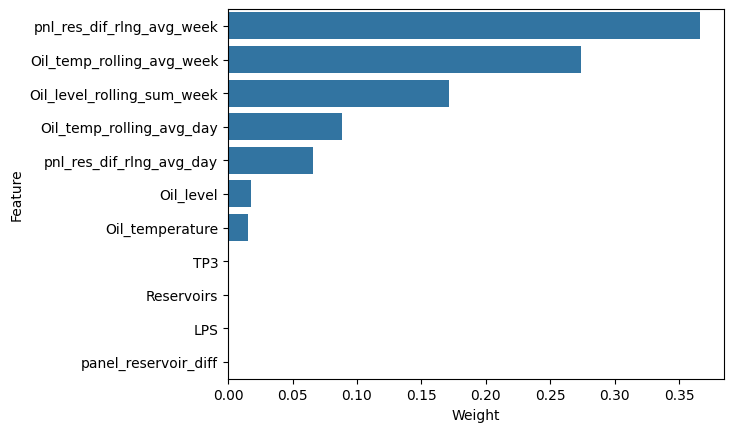

In [ ]:
# extracts the feature importances from the xgb_model2, appends the column names to them as a dataframe and plots them as a barplot
important_features = pd.DataFrame(data=zip(X2.columns, xgb_model2.feature_importances_), columns=["Feature","Weight"])

sns.barplot(data=important_features, x="Weight",y="Feature", order=important_features.sort_values("Weight", ascending=False).Feature)

#**Steps29_conclusion**

**The top four in order: the rolling average of oil temperature calculated over a week long window**

the rolling average over a week of the difference in pressure between the pneumatic panel and the reservoirs

the rolling average over a day of the difference in pressure between the pneumatic panel and the reservoirs

the rolling sum over a week of the low oil level indicator.

the rolling average over a day of the oil temperature

These 5 features show the importance of oil temperature, oil level, and the loss of air pressure between the pneumatic panel and the reservoirs in the system.

***These are inutitive findings that one would expect to lead to problems with machinery, and this model could be used in production to provide an Early Warning that the Air Production Unit should be examined for potential air leaks, and investiagte for low oil level and rise in oil temperature, potentially caused by the low oil level itself.***


#**reference**


Relevant Papers: [1]- Davari, N., Veloso, B., Ribeiro, R.P., Pereira, P.M., Gama, J.: Predictive maintenance based on anomaly detection using deep learning for air production unit in the railway industry. In: 2021 IEEE 8th International Conference on Data Science and Advanced Analytics (DSAA). pp. 1–10. IEEE (2021) (DOI: 10.1109/DSAA53316.2021.9564181) https://ieeexplore.ieee.org/document/9564181

[2] Veloso, B., Ribeiro, R.P., Pereira, P.M., Gama, J.: The MetroPT dataset for predictive maintenance. Scientific Data 9, no. 1 (2022): 764. (DOI: 10.1038/s41597-022-01877-3)

[3]-Barros, M., Veloso, B., Pereira, P.M., Ribeiro, R.P., Gama, J.: Failure detection of an air production unit in the operational context. In: IoT Streams for Data-Driven Predictive Maintenance and IoT, Edge, and Mobile for Embedded Machine Learning, pp. 61–74. Springer (2020) (DOI: 10.1007/978-3-030-66770-2_5)

Source: Narjes Davari, INESC TEC - Laboratory of Artificial Intelligence and Decision Support, narjes.davari@inesctec.pt Bruno Veloso, INESC TEC - Laboratory of Artificial Intelligence and Decision Support, and Faculty of Economics, University of Porto, Portugal bveloso@fep.up.pt Rita P. Ribeiro, INESC TEC - Laboratory of Artificial Intelligence and Decision Support, and Faculty of Sciences, University of Porto, Portugal. rpribeiro@fc.up.pt Joao Gama, INESC TEC - Laboratory of Artificial Intelligence and Decision Support, and Faculty of Economics, University of Porto, Portugal. jgama@fep.up.pt